Objective: Dataset Exploration

Date: Nov 2022

In [26]:
import numpy as numpy 
import pandas as pd
from sklearn.datasets import load_wine
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [27]:
data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [28]:
print(wine.iloc[:,:3].describe())

          alcohol  malic_acid         ash
count  178.000000  178.000000  178.000000
mean    13.000618    2.336348    2.366517
std      0.811827    1.117146    0.274344
min     11.030000    0.740000    1.360000
25%     12.362500    1.602500    2.210000
50%     13.050000    1.865000    2.360000
75%     13.677500    3.082500    2.557500
max     14.830000    5.800000    3.230000


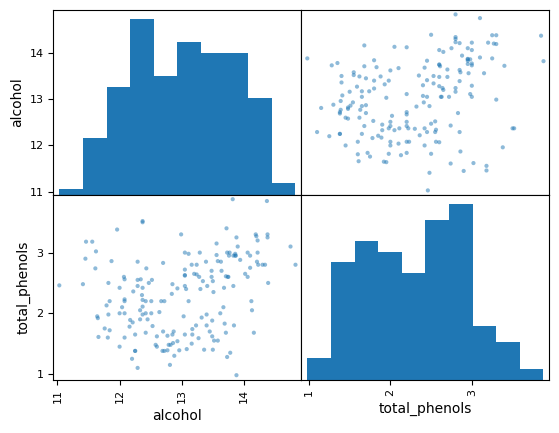

In [29]:
scatter_matrix(wine.iloc[:,[0,5]])
plt.savefig("plot.png")
plt.show()

In [30]:
X = wine[['alcohol', 'total_phenols']] 

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)

print(scale.mean_)
print(scale.scale_)

[13.00061798  2.29511236]
[0.80954291 0.62409056]


In [31]:
X_scaled = scale.transform(X)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[ 7.84141790e-15 -1.95536471e-16]
[1. 1.]


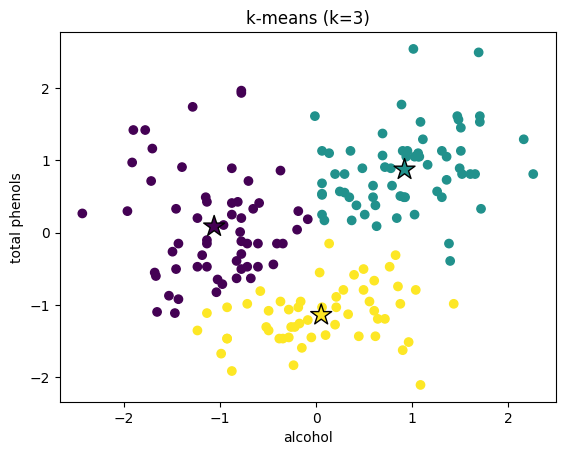

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
l
kmeans.fit(X_scaled)

y_pred = kmeans.predict(X_scaled)

import matplotlib.pyplot as plt

plt.scatter(X_scaled[:,0],
X_scaled[:,1],
c= y_pred)

plt.scatter(kmeans.cluster_centers_[:, 0],
kmeans.cluster_centers_[:, 1],
marker="*",
s = 250,
c = [0,1,2],
edgecolors='k')
plt.xlabel('alcohol'); plt.ylabel('total phenols')
plt.title('k-means (k=3)')

plt.show()